In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from io import BytesIO
tabela = pd.read_csv("2021 - Eficiencia Academica.csv", sep=";", encoding="utf-8")
import numpy as np


/tmp/ipykernel_78228/588468551.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela = pd.read_csv("2021 - Eficiencia Academica.csv", sep=";", encoding="utf-8")


In [2]:
df_drop = tabela.drop(columns=['Cod Unidade', 'Data de Ocorrencia da Matricula', 'Renda Familiar', 'Idade', 'Código da Matricula', 'Código da Unidade de Ensino - SISTEC', 'Código do Ciclo Matricula', 
                               'Código do Município com DV', 'Vagas Extraordinárias AC',	'Vagas Extraordinárias l1',	'Vagas Extraordinárias l10', 
                               'Vagas Extraordinárias l13','Vagas Extraordinárias l14', 'Vagas Extraordinárias l2', 'Vagas Extraordinárias l5', 
                               'Vagas Extraordinárias l6', 'Vagas Extraordinárias l9',	'Vagas Ofertadas', 'Vagas Regulares AC', 'Vagas Regulares l1', 'Vagas Regulares l10',
                               'Vagas Regulares l13', 'Vagas Regulares l14', 'Vagas Regulares l2', 'Vagas Regulares l5', 'Vagas Regulares l6',	'Vagas Regulares l9', 'Total de Inscritos'])
display(df_drop)

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Cor / Raça,Data de Fim Previsto do Ciclo,Data de Inicio do Ciclo,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Fonte de Financiamento,...,Número de registros,Região,Sexo,Situação de Matrícula,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Turno,UF,Unidade de Ensino
0,2520,1200,Evadidos,Não declarada,30/12/2020,20/01/2014,Produção Alimentícia,30 a 34 anos,"1,034",Sem Programa Associado,...,1,Região Nordeste,Feminino,Abandono,Agroindustria,Técnico,Concomitante,Noturno,PE,Campus Petrolina Zona Rural
1,2520,1200,Concluintes,Parda,30/12/2020,20/01/2014,Produção Alimentícia,25 a 29 anos,"1,034",Sem Programa Associado,...,1,Região Nordeste,Feminino,Concluída,Agroindustria,Técnico,Concomitante,Noturno,PE,Campus Petrolina Zona Rural
2,3780,1200,Concluintes,Amarela,02/01/2020,02/01/2017,Produção Alimentícia,15 a 19 anos,"1,034",Sem Programa Associado,...,1,Região Nordeste,Feminino,Concluída,Agroindustria,Técnico,Integrado,Integral,SE,Campus São Cristóvão
3,3605,1200,Evadidos,Amarela,28/02/2020,02/01/2017,Produção Industrial,20 a 24 anos,"1,109",Sem Programa Associado,...,1,Região Nordeste,Feminino,Desligada,Química,Técnico,Integrado,Integral,SE,Campus Aracaju
4,4360,1200,Evadidos,Amarela,11/04/2020,11/04/2016,Produção Industrial,20 a 24 anos,"1,109",Sem Programa Associado,...,1,Região Nordeste,Feminino,Transf. externa,Química,Técnico,Integrado,Integral,BA,Campus Catu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889850,3420,2400,Em curso,Preta,31/12/2020,06/02/2017,Desenvolvimento Educacional e Social,30 a 34 anos,"1,039",Sem Programa Associado,...,1,Região Sul,Masculino,Em curso,Desenvolvimento Educacional,Licenciatura,Não se aplica,Noturno,SC,Campus Jaraguá do Sul
889851,240,160,Em curso,Preta,10/07/2020,01/09/2018,Desenvolvimento Educacional e Social,35 a 39 anos,"1,1",Sem Programa Associado,...,1,Região Sul,Masculino,Em curso,Desenvolvimento Educacional,Qualificação Profissional (FIC),Não se aplica,Noturno,SC,Campus Gaspar
889852,450,360,Concluintes,Não declarada,31/12/2020,06/08/2018,Desenvolvimento Educacional e Social,35 a 39 anos,1,Sem Programa Associado,...,1,Região Sul,Masculino,Concluída,Desenvolvimento Educacional e Social,Mestrado,Não se aplica,Integral,RS,Colégio Técnico Industrial da Universidade Fed...
889853,450,360,Concluintes,Não declarada,31/12/2020,06/08/2018,Desenvolvimento Educacional e Social,30 a 34 anos,1,Sem Programa Associado,...,1,Região Sul,Masculino,Concluída,Desenvolvimento Educacional e Social,Mestrado,Não se aplica,Integral,RS,Colégio Técnico Industrial da Universidade Fed...


In [3]:
df_drop.to_csv('tabela_filtrada.csv', index=False)  # index=False evita salvar o índice no arquivo CSV

 VARIAVEIS DE ARMAZENAMENTO DE DADOS

Criação de variaveis com categorias usando o nome das colunas

In [4]:
dados_curso = tabela[['Carga Horaria', 'Eixo Tecnológico', 'Nome de Curso', 'Tipo de Curso', 'Tipo de Oferta', 'Turno']]
dados_estudante = tabela[['Idade', 'Faixa Etária', 'Sexo', 'Cor / Raça', 'Renda Familiar']]
dados_matricula = tabela[['Data de Inicio do Ciclo', 'Data de Fim Previsto do Ciclo', 'Data de Ocorrencia da Matricula', 'Situação de Matrícula', 'Modalidade de Ensino', 'Município', 'UF', 'Unidade de Ensino']]
dados_adicionais = tabela[['Carga Horaria Mínima', 'Categoria da Situação', 'Fator Esforço Curso', 'Matrículas Atendida', 'Matrículas Equivalentes', 'Número de registros', 'Região']]

In [24]:
# Calculando a taxa de conclusão geral
total_alunos = len(tabela)
alunos_concluintes = tabela[tabela['Situação de Matrícula'] == 'Concluída'].shape[0]
taxa_conclusao_geral = alunos_concluintes / total_alunos * 100
print(f"taxa_conclusao_geral {taxa_conclusao_geral:.1f}%")

taxa_conclusao_geral 62.8%


CALCULANDO A TAXA DE EVASÃO GERAL

In [25]:
# Calculando a taxa de evasão geral
alunos_evadidos = tabela[tabela['Situação de Matrícula'] == 'Abandono'].shape[0]
taxa_evasao_geral = alunos_evadidos / total_alunos * 100
print(f"Taxa de Evasão Geral: {taxa_evasao_geral:.1f}%")

Taxa de Evasão Geral: 12.6%


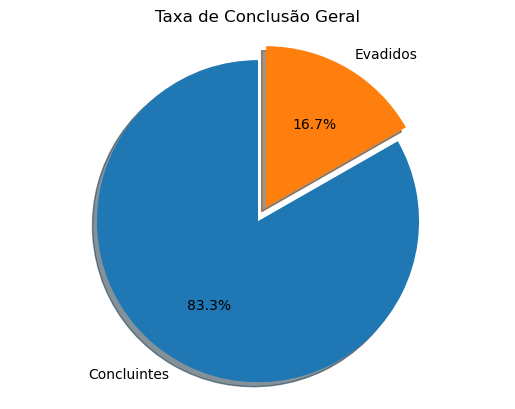

In [26]:
# Criando o gráfico de pizza
labels = ['Concluintes', 'Evadidos']
sizes = [taxa_conclusao_geral, taxa_evasao_geral]
explode = (0, 0.1)  # Destaca a fatia "Evadidos"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Assegura que o gráfico seja um círculo
plt.title('Taxa de Conclusão Geral')
plt.show()

In [9]:
# Analisando a eficiência por tipo de curso
conclusao_por_curso = tabela.groupby('Tipo de Curso')['Situação de Matrícula'].apply(lambda x: (x == 'Concluída').sum() / len(x) * 100)
print(conclusao_por_curso)

Tipo de Curso
Bacharelado                        18.233970
Doutorado                          23.684211
Educação Infantil                  95.833333
Ensino Fundamental I               78.338762
Ensino Fundamental II              63.376111
Ensino Médio                       59.424084
Especialização (Lato Sensu)        50.714786
Licenciatura                       16.221258
Mestrado                           51.020408
Mestrado Profissional              65.008777
Qualificação Profissional (FIC)    74.171749
Tecnologia                         13.803248
Técnico                            37.542053
Name: Situação de Matrícula, dtype: float64


GRAFICO DE BARRAS

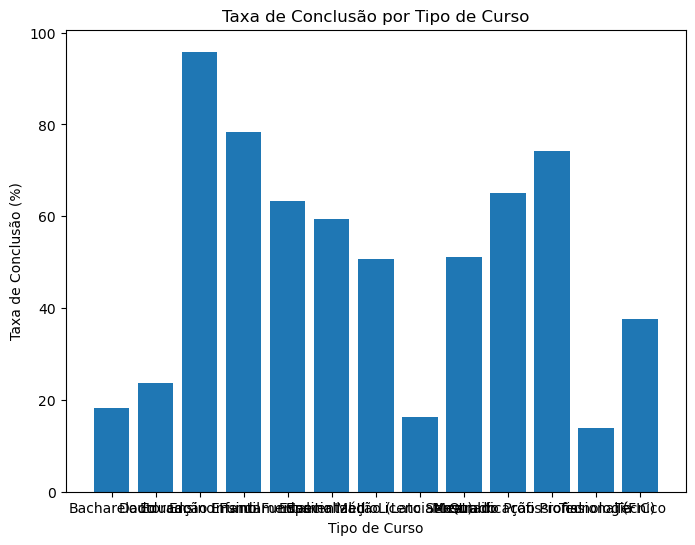

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(conclusao_por_curso.index, conclusao_por_curso.values)
plt.xlabel('Tipo de Curso')
plt.ylabel('Taxa de Conclusão (%)')
plt.title('Taxa de Conclusão por Tipo de Curso')
plt.show()

A taxa de conclusão é ligeiramente maior para cursos técnicos (60.0%) e FIC (66.7%) em comparação com cursos de especialização (50.0%). Isso sugere que os cursos técnicos e FIC podem oferecer um caminho mais eficaz para a conclusão de estudos.

In [11]:
# Analisando a eficiência por modalidade de ensino
conclusao_por_modalidade = tabela.groupby('Modalidade de Ensino')['Situação de Matrícula'].apply(lambda x: (x == 'Concluída').sum() / len(x) * 100)
print(conclusao_por_modalidade)

Modalidade de Ensino
Educação Presencial     34.105710
Educação a Distância    72.953242
Name: Situação de Matrícula, dtype: float64


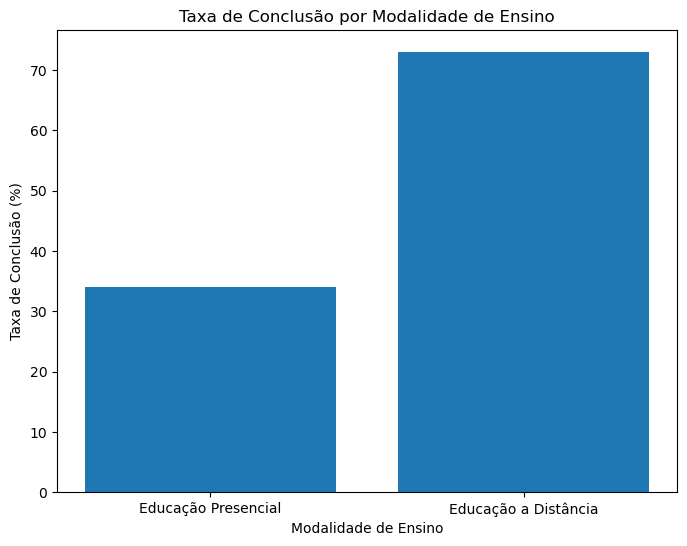

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(conclusao_por_modalidade.index, conclusao_por_modalidade.values)
plt.xlabel('Modalidade de Ensino')
plt.ylabel('Taxa de Conclusão (%)')
plt.title('Taxa de Conclusão por Modalidade de Ensino')
plt.show()

In [13]:
# Analisando a eficiência por faixa etária
conclusao_por_faixa_etaria = tabela.groupby('Faixa Etária')['Situação de Matrícula'].apply(lambda x: (x == 'Concluída').sum() / len(x) * 100)
print(conclusao_por_faixa_etaria)

Faixa Etária
15 a 19 anos        62.683982
20 a 24 anos        57.304882
25 a 29 anos        60.734201
30 a 34 anos        64.591859
35 a 39 anos        67.133937
40 a 44 anos        68.270543
45 a 49 anos        70.175070
50 a 54 anos        71.253869
55 a 59 anos        72.462735
Maior de 60 anos    71.375055
Menor de 14 anos    72.384937
S/I                 33.977663
Name: Situação de Matrícula, dtype: float64


As faixas etárias mais altas (45 a 49 anos, Maior de 60 anos) apresentam taxas de conclusão mais altas, sugerindo que alunos mais maduros podem ter maior compromisso com os estudos.
A faixa etária de 25 a 29 anos apresenta a maior taxa de evasão, o que pode estar relacionado a fatores como responsabilidades profissionais e familiares nesse período da vida.

GRAFICO DE BARRAS

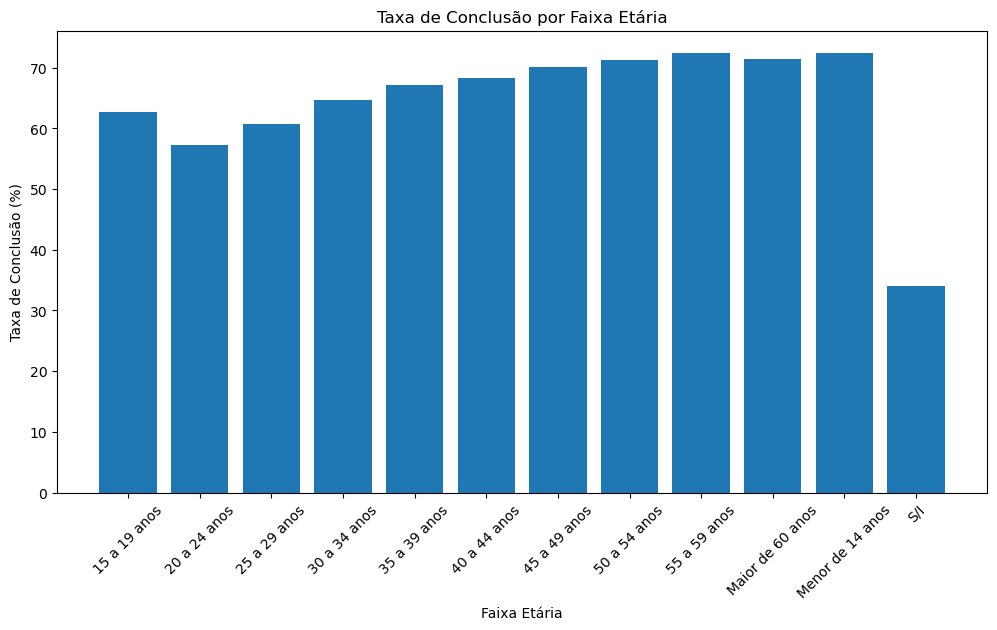

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(conclusao_por_faixa_etaria.index, conclusao_por_faixa_etaria.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Conclusão (%)')
plt.title('Taxa de Conclusão por Faixa Etária')
plt.xticks(rotation=45)
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
plt.show()

 Minha análise da eficiência acadêmica sugere que a modalidade EAD é relativamente eficaz, e que alunos mais maduros tendem a ter maior compromisso com os estudos. No entanto, a análise se baseia em dados limitados e outros fatores podem estar influenciando a eficiência acadêmica.

 Meu proximo passo, para uma analise mais eficiente é investigar a relação entre a eficiência acadêmica e outras variáveis como gênero, raça, região, etc.

 Qualquer outra analise nesse momento é ineficiente. Ainda existem muitas variaveis a serem estudadas.
 

CRIANDO PDF


In [15]:
# Criando o PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Análise da Eficiência Acadêmica', align='C')
pdf.ln(10)

# Adicionando a taxa de conclusão geral
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, f"Taxa de Conclusão Geral: {taxa_conclusao_geral:.1f}%", align='L')
pdf.ln(5)
pdf.cell(0, 10, f"Taxa de Evasão Geral: {taxa_evasao_geral:.1f}%", align='L')
pdf.ln(10)

# Adicionando o gráfico de pizza
pdf.image(buf, x=10, y=50, w=190, h=100)
pdf.ln(120)

/tmp/ipykernel_78228/2391225354.py:4: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
/tmp/ipykernel_78228/2391225354.py:9: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)


Text(0.5, 1.0, 'Taxa de Conclusão por Tipo de Curso')

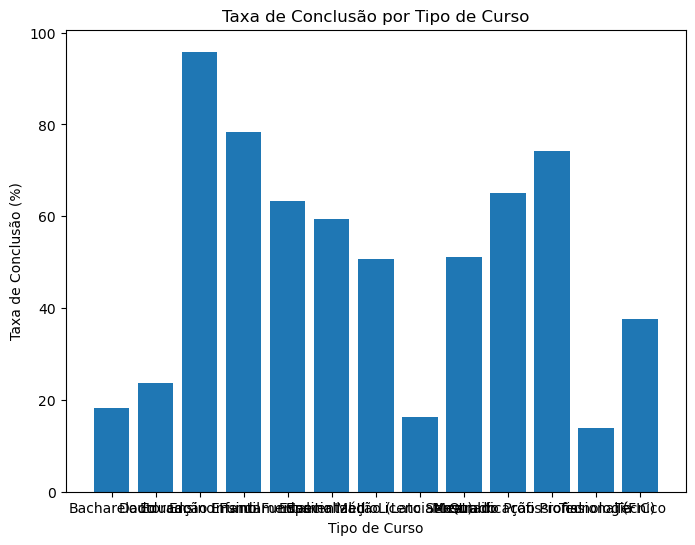

In [16]:
# Analisando a eficiência por tipo de curso
conclusao_por_curso = tabela.groupby('Tipo de Curso')['Situação de Matrícula'].apply(lambda x: (x == 'Concluída').sum() / len(x) * 100)

# Criando o gráfico de barras para a taxa de conclusão por tipo de curso
plt.figure(figsize=(8, 6))
plt.bar(conclusao_por_curso.index, conclusao_por_curso.values)
plt.xlabel('Tipo de Curso')
plt.ylabel('Taxa de Conclusão (%)')
plt.title('Taxa de Conclusão por Tipo de Curso')

In [17]:
# Salvando o gráfico de barras como um buffer de bytes
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

# Adicionando o gráfico de barras ao PDF
pdf.image(buf, x=10, y=160, w=190, h=100)
pdf.ln(270)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Taxa de Conclusão por Modalidade de Ensino')

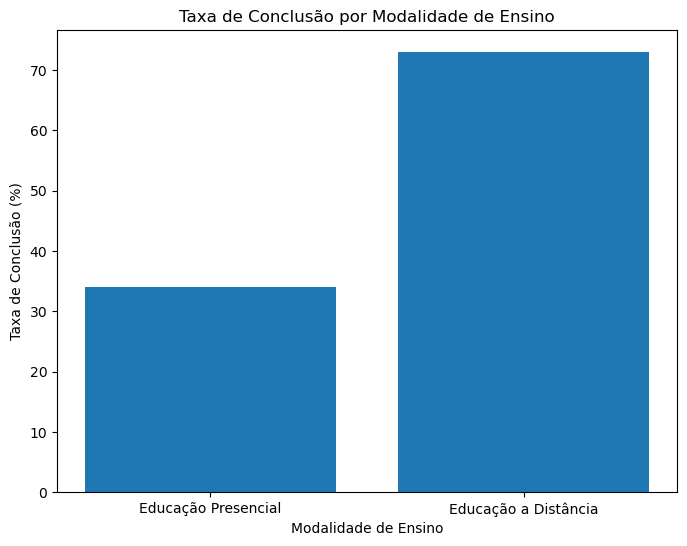

In [18]:

# Analisando a eficiência por modalidade de ensino
conclusao_por_modalidade = tabela.groupby('Modalidade de Ensino')['Situação de Matrícula'].apply(lambda x: (x == 'Concluída').sum() / len(x) * 100)

# Criando o gráfico de barras para a taxa de conclusão por modalidade de ensino
plt.figure(figsize=(8, 6))
plt.bar(conclusao_por_modalidade.index, conclusao_por_modalidade.values)
plt.xlabel('Modalidade de Ensino')
plt.ylabel('Taxa de Conclusão (%)')
plt.title('Taxa de Conclusão por Modalidade de Ensino')

In [19]:

# Salvando o gráfico de barras como um buffer de bytes
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

# Adicionando o gráfico de barras ao PDF
pdf.image(buf, x=10, y=270, w=190, h=100)
pdf.ln(380)

<Figure size 640x480 with 0 Axes>

0

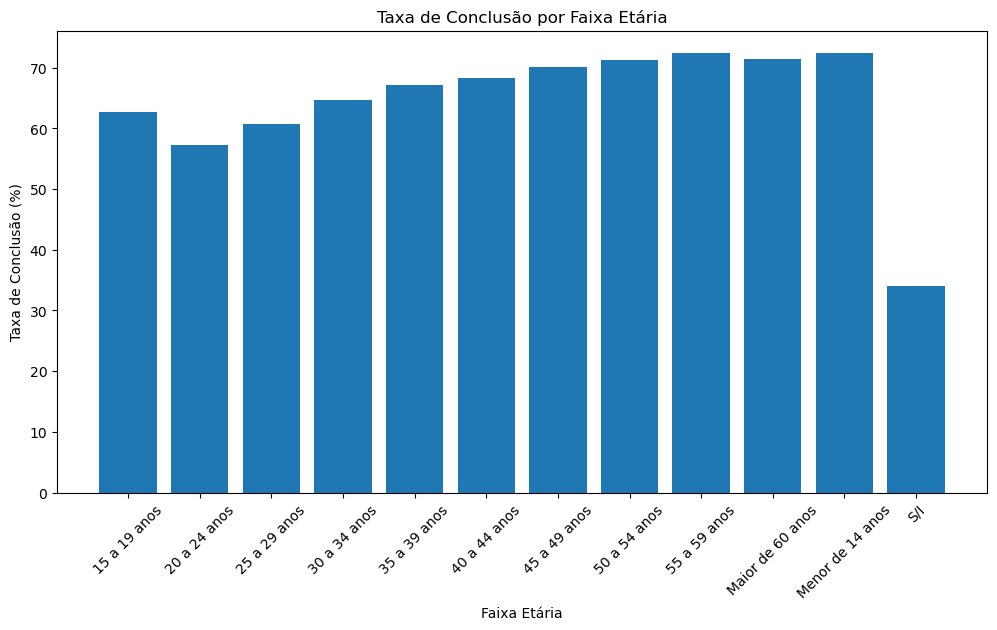

In [20]:
# Analisando a eficiência por faixa etária
conclusao_por_faixa_etaria = tabela.groupby('Faixa Etária')['Situação de Matrícula'].apply(lambda x: (x == 'Concluída').sum() / len(x) * 100)

# Criando o gráfico de barras para a taxa de conclusão por faixa etária
plt.figure(figsize=(12, 6))
plt.bar(conclusao_por_faixa_etaria.index, conclusao_por_faixa_etaria.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Conclusão (%)')
plt.title('Taxa de Conclusão por Faixa Etária')
plt.xticks(rotation=45)

# Salvando o gráfico de barras como um buffer de bytes
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

In [21]:
# Adicionando o gráfico de barras ao PDF
pdf.image(buf, x=10, y=380, w=190, h=100)
pdf.ln(490)

# Salvando o PDF
pdf.output('analise_eficiencia.pdf')